# Audio Data Analysis

In this notebook, we will explore various techniques for analyzing audio data. We will cover time-domain vs frequency-domain analysis, spectrum and cepstrum, and Fourier Transform (FFT) analysis.

## 1. Time-domain vs Frequency-domain Analysis

Audio data can be analyzed in both the time domain and the frequency domain. Understanding the differences between these two types of analysis is crucial for effective audio processing.

- **Time-domain Analysis**: Involves analyzing the audio signal with respect to time. It focuses on how the signal changes over time and is useful for understanding the waveform and temporal characteristics of the audio signal. Key aspects include:
  - **Waveform**: The shape of the audio signal when plotted against time.
  - **Amplitude**: The strength or intensity of the audio signal at any given point in time.
  - **Envelope**: The outline of the waveform that represents the overall amplitude variations over time.

- **Frequency-domain Analysis**: Involves analyzing the audio signal with respect to frequency. It focuses on the signal's frequency content and is useful for understanding the spectral characteristics of the audio signal. Key aspects include:
  - **Spectral Content**: The distribution of energy or power across different frequency components.
  - **Harmonics**: The integer multiples of the fundamental frequency present in the signal.
  - **Bandwidth**: The range of frequencies present in the signal.

Time-domain analysis is often used to visualize the raw audio signal, while frequency-domain analysis provides insights into the signal's harmonic content, noise levels, and other spectral features.

## 2. Spectrum and Cepstrum

- **Spectrum**: The spectrum of an audio signal represents the distribution of its power or energy across different frequency components. It is obtained by applying the Fourier Transform to the time-domain signal. The spectrum provides a detailed view of the signal's frequency content, helping to identify dominant frequencies, harmonics, and noise.
  - **Power Spectrum**: Shows the power of each frequency component.
  - **Magnitude Spectrum**: Shows the magnitude (absolute value) of each frequency component.

- **Cepstrum**: The cepstrum is the result of taking the inverse Fourier Transform of the logarithm of the spectrum of a signal. It is useful for identifying periodic structures and harmonics in the audio signal. The cepstrum helps in distinguishing between the harmonic content and the overall spectral envelope.
  - **Real Cepstrum**: Obtained by taking the inverse FFT of the logarithm of the magnitude spectrum.
  - **Complex Cepstrum**: Includes phase information and is obtained from the complex spectrum.

The cepstrum is particularly useful in speech processing and audio analysis for applications such as pitch detection and formant analysis.

## 3. Fourier Transform (FFT) Analysis

The Fourier Transform is a mathematical technique that transforms a time-domain signal into its frequency-domain representation. The Fast Fourier Transform (FFT) is an efficient algorithm for computing the Fourier Transform.

- **Discrete Fourier Transform (DFT)**: The DFT converts a finite sequence of equally spaced samples of a function into a same-length sequence of equally spaced samples of the discrete-time Fourier Transform (DTFT). It provides a way to analyze the frequency content of discrete signals.
  - **Formula**: The DFT of a sequence $x[n]$ is given by:
---


>$$X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j2\pi kn/N}$$
Where:
- $N$ is the number of samples
- $k$ is the frequency bin
- $j$ is the imaginary unit.


---

- **Fast Fourier Transform (FFT)**: The FFT is an efficient algorithm to compute the DFT and its inverse. It reduces the computational complexity from $O(n^2)$ to $O(n \log n)$, making it feasible to analyze large datasets and real-time signals.
  - **Advantages**:
    - Faster computation compared to direct DFT.
    - Widely used in digital signal processing, audio analysis, and communication systems.


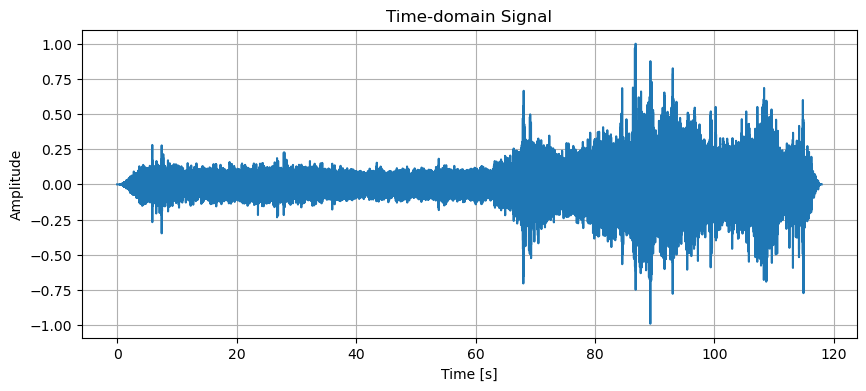

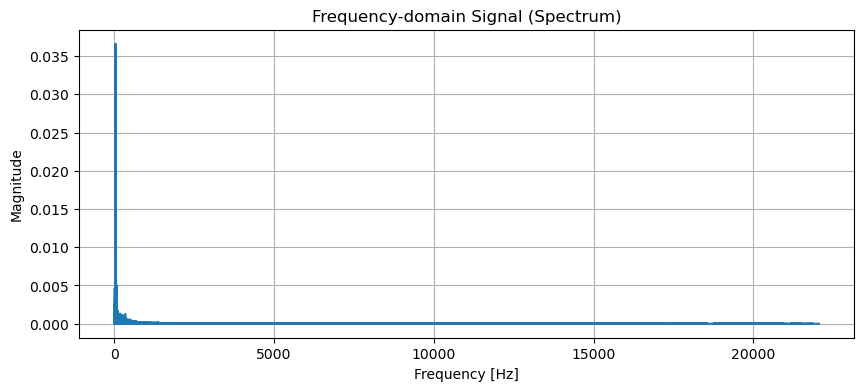

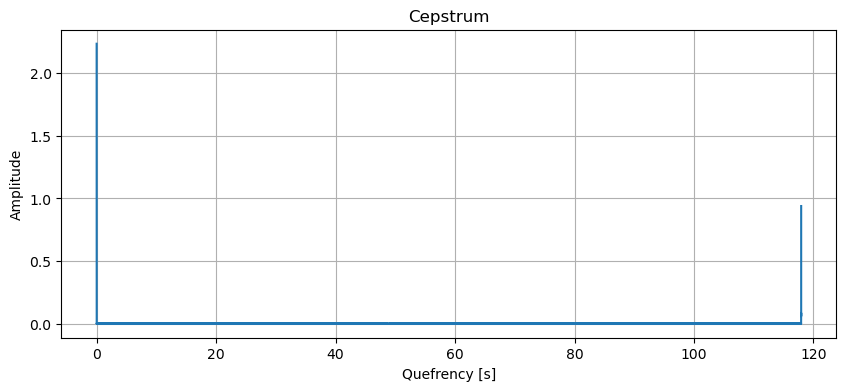

In [6]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.io import wavfile
import warnings

# Suppress warnings from wavfile read
warnings.filterwarnings('ignore', category=UserWarning, append=True)

# Function to plot time-domain signal
def plot_time_domain(signal, sampling_rate):
    time = np.linspace(0., len(signal) / sampling_rate, len(signal))
    plt.figure(figsize=(10, 4))
    plt.plot(time, signal)
    plt.title('Time-domain Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# Function to plot frequency-domain signal (spectrum)
def plot_frequency_domain(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    yf = fft(signal)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    plt.figure(figsize=(10, 4))
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title('Frequency-domain Signal (Spectrum)')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.show()

# Function to plot cepstrum
def plot_cepstrum(signal, sampling_rate):
    spectrum = np.abs(fft(signal))
    log_spectrum = np.log(spectrum + 1e-10)
    cepstrum = np.abs(ifft(log_spectrum))
    time = np.linspace(0., len(cepstrum) / sampling_rate, len(cepstrum))
    plt.figure(figsize=(10, 4))
    plt.plot(time, cepstrum)
    plt.title('Cepstrum')
    plt.xlabel('Quefrency [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# Load sample audio file
sampling_rate, signal = wavfile.read('in_the_Parisian_Metro.wav')

# Ensure the signal is mono
if signal.ndim > 1:
    signal = signal[:, 0]

# Normalize the signal
signal = signal / np.max(np.abs(signal))

# Plot time-domain signal
plot_time_domain(signal, sampling_rate)

# Plot frequency-domain signal (spectrum)
plot_frequency_domain(signal, sampling_rate)

# Plot cepstrum
plot_cepstrum(signal, sampling_rate)
